In [5]:
import pandas as pd

# Read the combined DataFrame from the CSV file
combined_df = pd.read_csv('dat/combined_data.csv')


# Filter the DataFrame to include only votes after 2020
filtered_df = combined_df[combined_df['Wahlperiode'] == 19]

# Combine the 'Name' and 'Vorname' columns to create a full name column
filtered_df['FullName'] = filtered_df['Vorname'] + ' ' + filtered_df['Name']

# Group by 'FullName' and calculate the total votes and 'yes' votes for each person
vote_counts = filtered_df.groupby('FullName').agg(
    total_votes=('ja', 'size'),
    yes_votes=('ja', 'sum')
).reset_index()

# Calculate the relative score (ratio of 'yes' votes to total votes)
vote_counts['relative_yes_score'] = vote_counts['yes_votes'] / vote_counts['total_votes']

# Sort the DataFrame by the relative yes score in descending order
vote_counts = vote_counts.sort_values(by='relative_yes_score', ascending=False)

# Find the person with the highest relative 'yes' score
highest_relative_yes_score = vote_counts.iloc[0]

# Display the result
print(f"The person with the highest relative 'yes' score is {highest_relative_yes_score['FullName']} with a score of {highest_relative_yes_score['relative_yes_score']:.2f}.")

# Display the sorted DataFrame with relative scores
print(vote_counts[:100])
print(vote_counts[-20:])


The person with the highest relative 'yes' score is Susanne Wetterich with a score of 1.00.
                  FullName  total_votes  yes_votes  relative_yes_score
644      Susanne Wetterich            3          3            1.000000
677        Thomas Viesehon           20         15            0.750000
687            Tobias Zech           43         32            0.744186
298  Isabel Mackensen-Geis           14         10            0.714286
77               Bela Bach           91         63            0.692308
..                     ...          ...        ...                 ...
437           Marian Wendt          126         84            0.666667
258   Hans-Joachim Fuchtel          126         84            0.666667
681         Timon Gremmels          126         84            0.666667
35          Andreas Steier          126         84            0.666667
441       Marie-Luise Dött          126         84            0.666667

[100 rows x 4 columns]
              FullName  total_vo

/tmp/ipykernel_77310/983006826.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['FullName'] = filtered_df['Vorname'] + ' ' + filtered_df['Name']


In [ ]:

# Group by 'FullName' and calculate the total votes and 'yes' votes for each person
nicht_abgegeben = filtered_df.groupby('FullName').agg(
    total_votes=('nichtabgegeben', 'size'),
    nicht_abgegeben=('nichtabgegeben', 'sum'),
        partei=('Fraktion/Gruppe', 'first')  
).reset_index()

nicht_abgegeben["relative_nicht_abgegeben"] = nicht_abgegeben["total_votes"] / nicht_abgegeben["nicht_abgegeben"]
nicht_abgegeben = nicht_abgegeben[nicht_abgegeben["total_votes"] == 126]

nicht_abgegeben = nicht_abgegeben.sort_values(by="relative_nicht_abgegeben")
nicht_abgegeben.head()

,FullName,total_votes,nicht_abgegeben,partei,relative_nicht_abgegeben
24,Andrea Nahles,2,2,SPD,1.000000
314,Jimmy Schulz,14,14,FDP,1.000000
614,Sigmar Gabriel,2,2,SPD,1.000000
377,Kerstin Andreae,2,2,BÜ90/GR,1.000000
650,Sylvia Gabelmann,126,124,DIE LINKE.,1.016129
...,...,...,...,...,...
457,Martin Erwin Renner,126,30,AfD,4.200000
635,Stephan Kühn (Dresden),64,15,BÜ90/GR,4.266667
60,Arnold Vaatz,126,29,CDU/CSU,4.344828
425,Marcel Klinge,126,29,FDP,4.344828


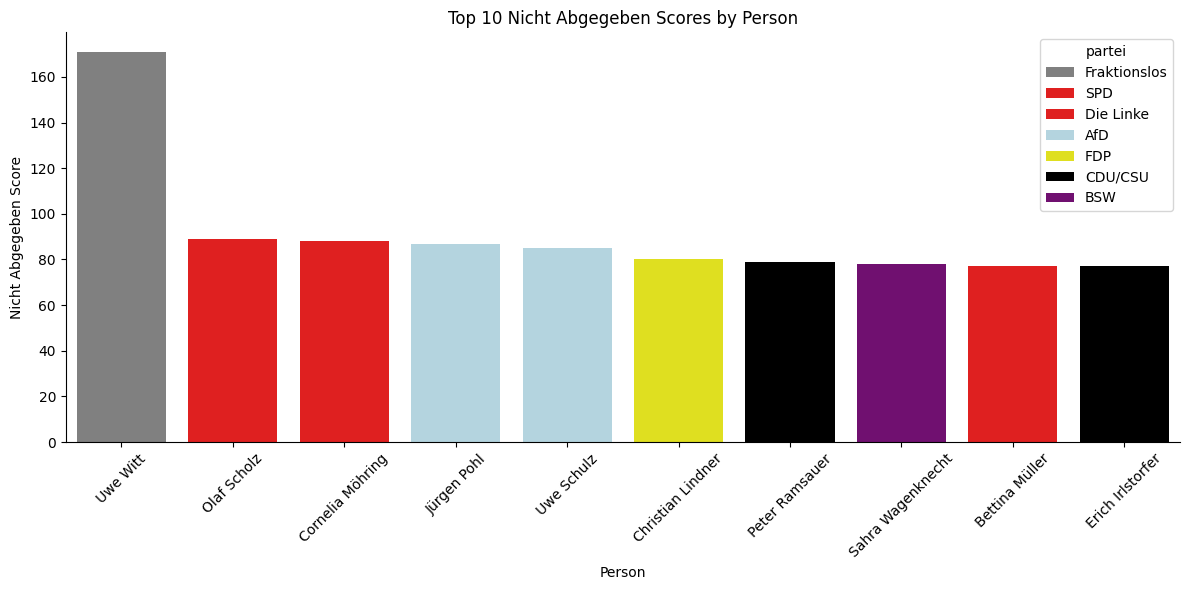

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns 
color_map = {
    'Fraktionslos': 'grey',    # brown (instead of 'braun')
    'SPD': 'red',               # red (instead of 'rot')
    'AfD': 'lightblue',         # light blue (instead of 'hellblau')
    'CDU/CSU': 'black',         # black (instead of 'schwarz')
    'FDP': 'yellow',            # yellow (instead of 'gelb')
    'Die Linke': 'red',         # red (remains 'red' as 'rot' is translated)
    'BSW': 'purple',            # purple (instead of 'violett')
}
# Sort the DataFrame by 'nicht_abgegeben' in descending order
nicht_abgegeben = nicht_abgegeben.sort_values(by='nicht_abgegeben', ascending=False)
# Select the top 10 rows
top_10 = nicht_abgegeben.head(10)

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='FullName', y='nicht_abgegeben', hue='partei', data=top_10, palette=color_map)
sns.despine()
# Label the plot
plt.title('Top 10 Nicht Abgegeben Scores by Person')
plt.xlabel('Person')
plt.ylabel('Nicht Abgegeben Score')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()
